# 第7回 識別その3: 続・様々な識別手法の紹介

いつものように右上の「Remix」ボタンを押して自分用の複製を作成すれば、各セルを「Shift+Enter」で実行しながら読むことができます

編集を行なった後は、Windowsは「Ctrl+s」、Macは「Cmd+s」で保存することができます

必要なパッケージを読み込みます。今回は決定木のパッケージであるDecisionTreeを使うので、まずそれをインストールします

In [1]:
]add DecisionTree

In [1]:
using Plots, Statistics, CSV, DecisionTree

# フィッシャーのあやめの読み込み

今回は最初からフィッシャーのあやめを題材に使います。

アヤメの個体150サンプルについて、以下の4つの特徴量を計測して、その種(3種, setosa, versicolor, virginica)がラベル付けされています。

1. SepalLength ガクの長さ (cm単位、説明変数)
2. SepalWidth ガクの太さ (cm単位、説明変数)
3. PetalLength 花弁の長さ (cm単位、説明変数)
4. PetalWidth 花弁の太さ (cm単位、説明変数)
5. Species 種類 (setosa, versicolor, virginica、ラベル・目的変数)

[iris.csv](https://nextjournal.com/data/QmP6fvLv5D5ozPEcbK1vxmbBua2cVZGs7paMudgjhJox5U?content-type=text/csv&node-id=dd37696c-2e66-4a92-ac5c-11c1443b4030&filename=iris.csv&node-kind=file)

![iris.png](https://nextjournal.com/data/QmcsTUT7gawLt7FGkvJhLYSug8S6Zi8t4DcfkchqF3dzR9?content-type=image/png&node-id=a4e7eb42-a204-410d-b0b2-e0c7bee2c663&filename=iris.png&node-kind=file)


In [1]:
# CSVデータの読み込み
iris = CSV.read("/.nextjournal/data-named/QmP6fvLv5D5ozPEcbK1vxmbBua2cVZGs7paMudgjhJox5U/iris.csv")

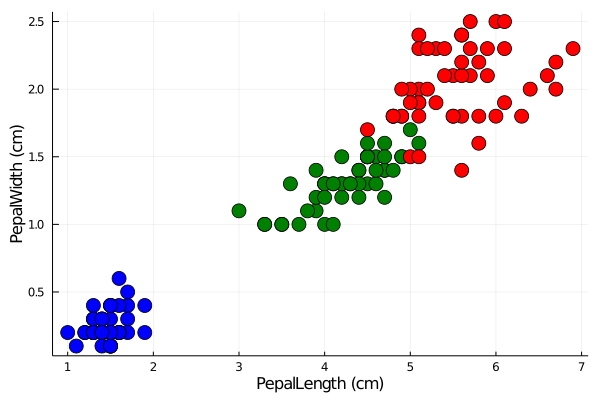

In [1]:
# データの整形と可視化
N = size(iris, 1)

y = Array{String}(undef, N)
c = fill(:blue, N)
for n = 1:N
  y[n] = iris.Species[n]
  if y[n] == "setosa"
    c[n] = :blue
  elseif y[n] == "versicolor"
    c[n] = :green
  else #verginica
    c[n] = :red
  end
end

x = Array(iris[:, 2:5])

scatter(x[:, 3], x[:, 4], xlabel="PepalLength (cm)", ylabel="PepalWidth (cm)", markersize=8, markercolor=c, legend=:false)

In [1]:
# 訓練用データとテスト用データに分けておきます
y_train = y[1:2:end]
x_train = x[1:2:end, :]
y_test = y[2:2:end]
x_test = x[2:2:end, :]

75×4 Array{Float64,2}:
 4.9  3.0  1.4  0.2
 4.6  3.1  1.5  0.2
 5.4  3.9  1.7  0.4
 5.0  3.4  1.5  0.2
 4.9  3.1  1.5  0.1
 4.8  3.4  1.6  0.2
 4.3  3.0  1.1  0.1
 5.7  4.4  1.5  0.4
 5.1  3.5  1.4  0.3
 5.1  3.8  1.5  0.3
 ⋮              
 6.3  2.8  5.1  1.5
 7.7  3.0  6.1  2.3
 6.4  3.1  5.5  1.8
 6.9  3.1  5.4  2.1
 6.9  3.1  5.1  2.3
 6.8  3.2  5.9  2.3
 6.7  3.0  5.2  2.3
 6.5  3.0  5.2  2.0
 5.9  3.0  5.1  1.8

# 決定木

In [1]:
# 決定木の作成と学習
model = DecisionTreeClassifier(max_depth=2)
fit!(model, x_train, y_train)

DecisionTreeClassifier
max_depth:                2
min_samples_leaf:         1
min_samples_split:        2
min_purity_increase:      0.0
pruning_purity_threshold: 1.0
n_subfeatures:            0
classes:                  ["setosa", "versicolor", "virginica"]
root:                     Decision Tree
Leaves: 3
Depth:  2

In [1]:
# 学習結果の表示
print_tree(model, 2)

In [1]:
# 識別のテスト
predict(model, [5.9, 3.0, 5.1, 1.9])

"virginica"

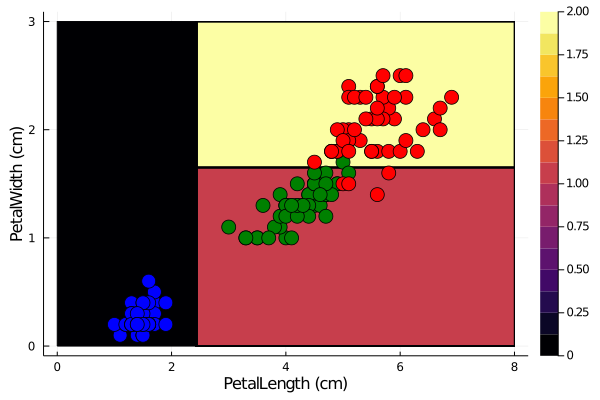

In [1]:
# 識別の可視化。x3とx4の空間で可視化する。x1とx2は平均値を用いる
function f(x3, x4)
  y = predict(model, [mean(x_train[:, 1]), mean(x_train[:, 2]), x3, x4])
  if y == "setosa"
    return 0
  elseif y == "versicolor"
    return 1
  else
    return 2
  end
end

x3 = range(0.0, 8.0, length = 200)
x4 = range(0.0, 3.0, length = 200)
contourf(x3, x4, f)

scatter!(x[:, 3], x[:, 4], xlabel="PetalLength (cm)", ylabel="PetalWidth (cm)", markersize=8, markercolor=c, legend=false)

In [1]:
# テスト用データを使って汎化性能を評価
predicted_labels = predict(model, x_test);
println("Accuracy is ", mean((predicted_labels .== y_test))*100, " %")

# Random forest

アンサンブル学習の代表手法であるランダムフォレストを使ってみましょう

In [1]:
# ランダムフォレストの作成と学習
model = RandomForestClassifier(max_depth=2, n_trees=100)
fit!(model, x_train, y_train)

RandomForestClassifier
n_trees:             100
n_subfeatures:       -1
partial_sampling:    0.7
max_depth:           2
min_samples_leaf:    1
min_samples_split:   2
min_purity_increase: 0.0
classes:             ["setosa", "versicolor", "virginica"]
ensemble:            Ensemble of Decision Trees
Trees:      100
Avg Leaves: 3.21
Avg Depth:  2.0

In [1]:
# 識別のテスト
predict(model, [5.9, 3.0, 5.1, 1.9])

"virginica"

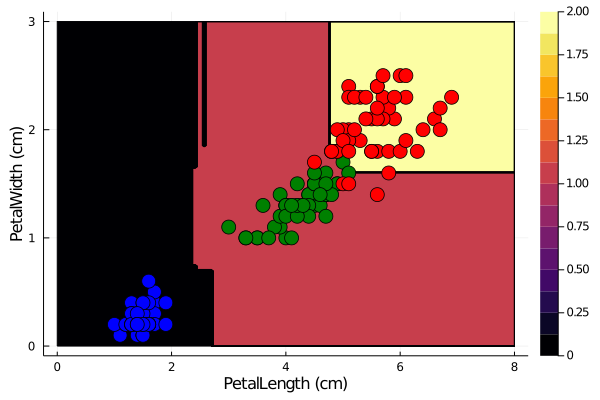

In [1]:
# 識別の可視化。x3とx4の空間で可視化する。x1とx2は平均値を用いる
x3 = range(0.0, 8.0, length = 200)
x4 = range(0.0, 3.0, length = 200)
contourf(x3, x4, f)

scatter!(x[:, 3], x[:, 4], xlabel="PetalLength (cm)", ylabel="PetalWidth (cm)", markersize=8, markercolor=c, legend=false)

In [1]:
# テスト用データを使って汎化性能を評価
predicted_labels = predict(model, x_test);
println("Accuracy is ", mean((predicted_labels .== y_test))*100, " %")

# AdaBoost

ブースティングの一つであるAdaBoostを使ってみましょう

In [1]:
# AdaBoostの作成と学習
model = AdaBoostStumpClassifier(n_iterations=30)
fit!(model, x_train, y_train)

AdaBoostStumpClassifier
n_iterations: 30
classes:      ["setosa", "versicolor", "virginica"]
ensemble:     Ensemble of Decision Trees
Trees:      30
Avg Leaves: 2.0
Avg Depth:  1.0

In [1]:
# 識別のテスト
predict(model, [5.9, 3.0, 5.1, 1.9])

"virginica"

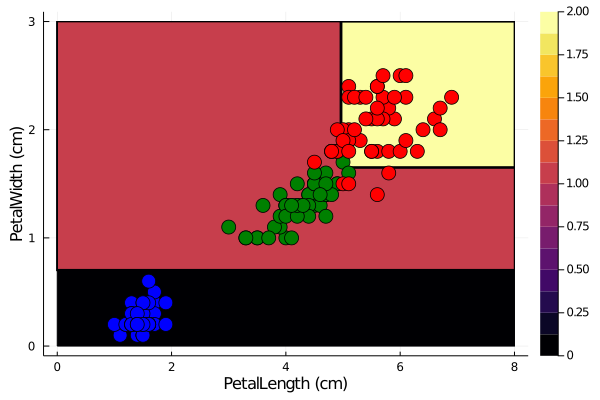

In [1]:
# 識別の可視化。x3とx4の空間で可視化する。x1とx2は平均値を用いる
x3 = range(0.0, 8.0, length = 200)
x4 = range(0.0, 3.0, length = 200)
contourf(x3, x4, f)

scatter!(x[:, 3], x[:, 4], xlabel="PetalLength (cm)", ylabel="PetalWidth (cm)", markersize=8, markercolor=c, legend=false)

In [1]:
# テスト用データを使って汎化性能を評価
predicted_labels = predict(model, x_test);
println("Accuracy is ", mean((predicted_labels .== y_test))*100, " %")

# やってみよう：MNISTの識別

決定木を使ってMNISTの手書き数字データを識別させてみましょう。パラメータを変更したり、Random forestやAdaBoostにして遊んでみてください。

MNISTデータは機械学習の画像認識の分野で有名なデータです。0から9までの数字を手書きした画像データ 60,000枚に対してその答えである数字がラベルされています。

* 1列目 数字の答え (ラベル、目的変数)
* 2列目〜785列目 28×28ピクセルの白黒画像の濃淡 (説明変数)

データ容量の制限から、ここでは画像データ60,000枚を5,000枚に削減したものを置いておきます。

[mnist_reduced.csv](https://nextjournal.com/data/QmUsVajJ792FPfc9AEqm3C2EdemFfCUTERQpEgModigvjW?content-type=text/csv&node-id=b2de440c-98a1-47cf-a464-eb96d862f36e&filename=mnist_reduced.csv&node-kind=file)


In [1]:
# CSVデータの読み込み、labelは正解の数字を示す。その他のカラムは画像の各ピクセルの濃さ(白黒)に対応する
mnist = CSV.read("/.nextjournal/data-named/QmUsVajJ792FPfc9AEqm3C2EdemFfCUTERQpEgModigvjW/mnist_reduced.csv")

# データが1列目のラベル(数字)以外は画像なので、Array(Matrix)へ変換して扱うことにする
mnist = Float64.(convert(Matrix, mnist))

5000×785 Array{Float64,2}:
 5.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 4.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 9.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 2.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 3.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 4.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 ⋮                        ⋮              ⋱            ⋮                   
 7.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 8.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 

In [1]:
y_train = string.(Int.(mnist[1:2500, 1]))
x_train = mnist[1:2500, 2:end]
y_test = string.(Int.(mnist[2501:end, 1]))
x_test = mnist[2501:end, 2:end]

2500×784 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 ⋮                        ⋮              ⋱                 ⋮              
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 

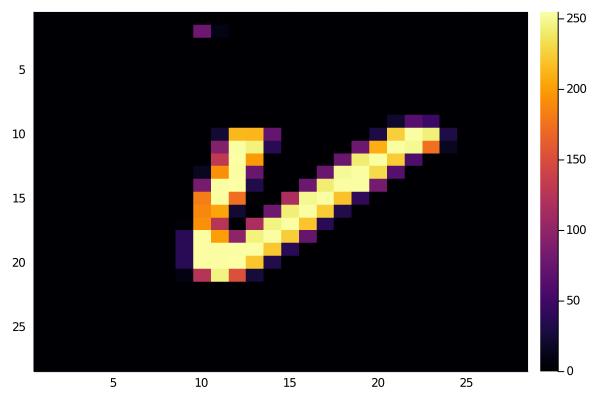

In [1]:
# 試しに30番目のエントリ(30行列目)の画像を表示させてみる
@show y_train[30]
heatmap(reshape(x_train[30, :]', 28, 28), yflip=true)

In [1]:
# ランダムフォレストの作成と学習
model = DecisionTreeClassifier()
# model = RandomForestClassifier(n_trees=100)
# model = AdaBoostStumpClassifier(n_iterations=100)
fit!(model, x_train, y_train)

DecisionTreeClassifier
max_depth:                -1
min_samples_leaf:         1
min_samples_split:        2
min_purity_increase:      0.0
pruning_purity_threshold: 1.0
n_subfeatures:            0
classes:                  ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]
root:                     Decision Tree
Leaves: 292
Depth:  12

In [1]:
# 識別のテスト
@info predict(model, x_test[1, :])
@info y_test[1]

In [1]:
# テスト用データを使って汎化性能を評価
predicted_labels = predict(model, x_test);
println("Accuracy is ", mean((predicted_labels .== y_test))*100, " %")